# Worksheet 08

Name:  Isabella Taboada

UID: U52535262

### Topics

- Clustering Aggregation
- Singular Value Decomposition

### Clustering Aggregation

| Point | C | P |
|-------|---|---|
| A     | 0 | a |
| B     | 0 | b |
| C     | 2 | b |
| D     | 1 | c |
| E     | 1 | d |

a) Fill in the following table where for each pair of points determine whether C and P agree or disagree on how to cluster that pair.
Agree: pair of points clustered together or seperately in both clusterings
Disagree: pair of points clustered separately vs together in the clusterings

| Pair | Disagreement |
|------|--------------|
| A  B |      Disagree       |
| A  C |      Agree       |
| A  D |      Agree       |
| A  E |      Agree       |
| B  C |      Disagree       |
| B  D |      Agree      |
| B  E |      Agree       |
| C  D |      Agree      |
| C  E |      Agree      |
| D  E |        Disagree    |


As datasets become very large, this process can become computationally challenging.

b) Given N points, what is the formula for the number of unique pairs of points one can create?

$N \choose 2$ = $\frac{N!}{2!(N-2)}$

Assume that clustering C clusters all points in the same cluster and clustering P clusters points as such:

| Point | P |
|-------|---|
| A     | 0 |
| B     | 0 |
| C     | 0 |
| D     | 1 |
| E     | 1 |
| F     | 2 |
| G     | 2 |
| H     | 2 |
| I     | 2 |

c) What is the maximum number of disagreements there could be for a dataset of this size? (use the formula from b)?

$9 \choose 2$ $ = 36$ 

d) If we look at cluster 0. There are (3 x 2) / 2 = 3 pairs that agree with C (since all points in C are in the same cluster). For each cluster, determine how many agreements there are. How many total agreements are there? How many disagreements does that mean there are between C and P?

Cluster 0: 3

Cluster 1: 1

Cluster 2: 6

10 total Agreements

26 disagreements

e) Assuming that filtering the dataset by cluster number is a computationally easy operation, describe an algorithm inspired by the above process that can efficiently compute disagreement distances on large datasets.

1. Divide the dataset into two parts: a "filter" set and a "remaining" set. The filter set contains all points that are assigned to a particular cluster in one of the clusterings (the "reference clustering"), and the remaining set contains all other points.
2. For each point in the remaining set, compute its distance to each point in the filter set using a suitable distance metric (e.g., Euclidean distance, cosine similarity, etc.). Note that we only need to compute distances between points in different sets.
3. For each point in the remaining set, find the point in the filter set that is closest to it (i.e., has the smallest distance).
4. For each pair of points that are assigned to different clusters in the two clusterings, count the number of pairs where the closest point in the filter set is assigned to the same cluster as the other point.
5. Divide the count from step 4 by the total number of pairs to obtain the disagreement distance.

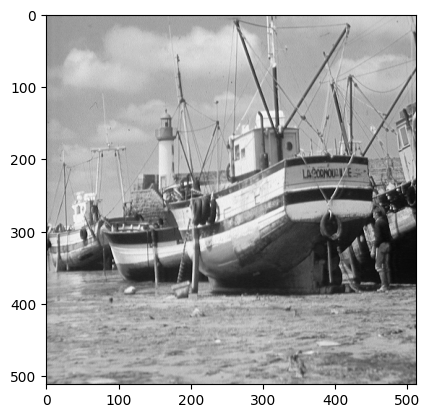

In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

boat = np.loadtxt('./boat.dat')
plt.figure()
plt.imshow(boat, cmap = cm.Greys_r)

a) Plot the singular values of the image above (note: a gray scale image is just a matrix).

In [2]:
u,s,vt=np.linalg.svd(boat,full_matrices=False)
len(s)

512

Notice you can get the image back by multiplying the matrices back together:

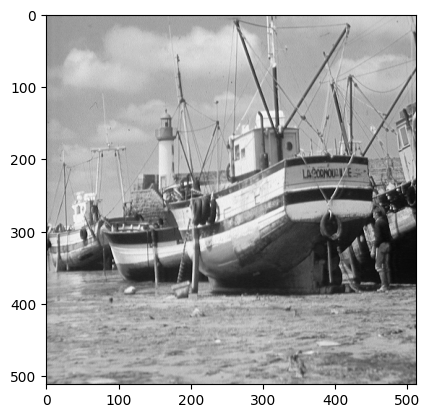

In [3]:
boat_copy = u.dot(np.diag(s)).dot(vt)
plt.figure()
plt.imshow(boat_copy, cmap = cm.Greys_r)

b) Create a new matrix `scopy` which is a copy of `s` with all but the first singular value set to 0.

In [4]:
scopy = s.copy()
scopy[1:] = 0.0

c) Create an approximation of the boat image by multiplying `u`, `scopy`, and `v` transpose. Plot them side by side.

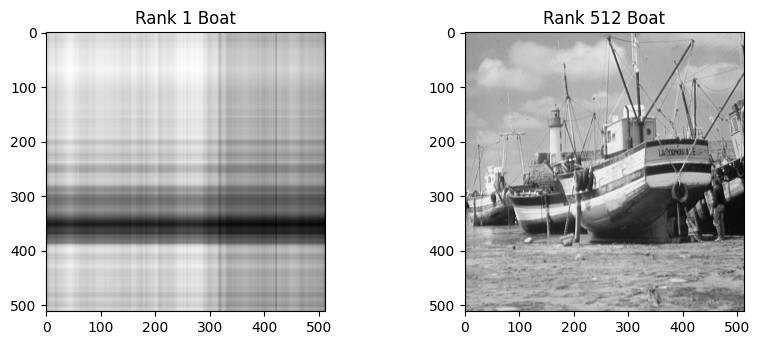

In [5]:
boat_app = u.dot(np.diag(scopy)).dot(vt)

plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(boat_app, cmap = cm.Greys_r)
plt.title('Rank 1 Boat')
plt.subplot(1,2,2)
plt.imshow(boat, cmap = cm.Greys_r)
plt.title('Rank 512 Boat')
_ = plt.subplots_adjust(wspace=0.5)
plt.show()

d) Repeat c) with 40 singular values instead of just 1.

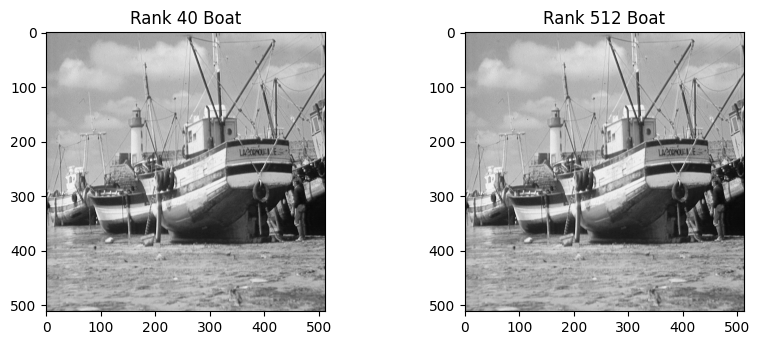

In [6]:
scopy40 = s.copy()
scopy[40:] = 0.0
boat_app = u.dot(np.diag(scopy40)).dot(vt)

plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(boat_app, cmap = cm.Greys_r)
plt.title('Rank 40 Boat')
plt.subplot(1,2,2)
plt.imshow(boat, cmap = cm.Greys_r)
plt.title('Rank 512 Boat')
_ = plt.subplots_adjust(wspace=0.5)
plt.show()

Next, we generate random points on the Euclidean plane:

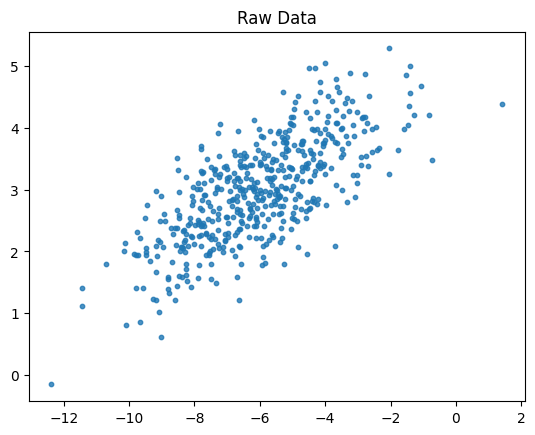

In [7]:
n_samples = 500
C = np.array([[0.1, 0.6], [2., .6]])
X = np.random.randn(n_samples, 2) @ C + np.array([-6, 3])
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
plt.title("Raw Data")
plt.show()

e) Mean-center the data and plot it.

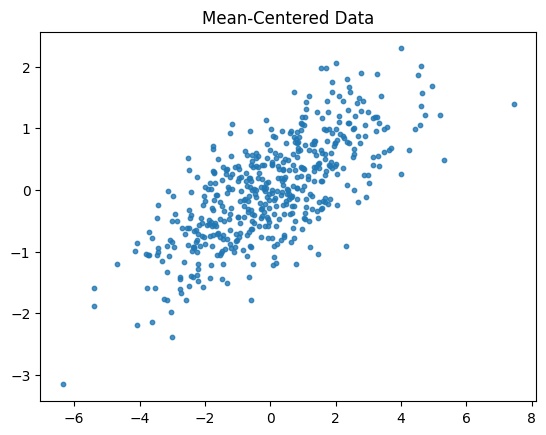

In [9]:
x_cent= X - X.mean(axis=0)
plt.scatter(x_cent[:, 0], x_cent[:, 1], s=10, alpha=0.8)
plt.title("Mean-Centered Data")
plt.show()

f) Decompose the mean-centered data using SVD. How many singular values do you expect there will be? Why?

In [10]:
u,s,vt=np.linalg.svd(x_cent)
len(s)

2

2 singular values since the matrix is rank 2/spans a 2-Dimensional space

g) Appoximating the data using either the first or second singular value will result in a 1-dimensional data set (i.e. it fits on a line). If you only had a line to approximate the above data, where would it lie on the plot? explain.

The line would be like a best fit line since we are trying to project all the points to 1 dimension.

h) Approximate the mean-centered data using only the first singular value. Plot both the mean-centered data and the approximation on the same plot using two different colors.

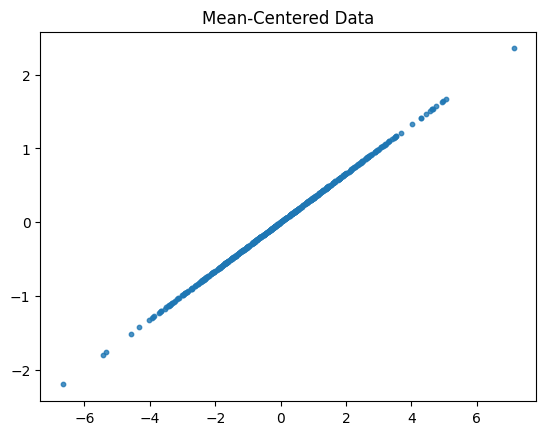

In [11]:
u, s, vt = np.linalg.svd(x_cent)
x_approx = u[:, :1] @ np.diag(s[:1]) @ vt[:1, :]
plt.scatter(x_approx[:, 0], x_approx[:, 1], s=10, alpha=0.8)
plt.title("Mean-Centered Data")
plt.show()

i) Repeat h) using only the second singular value. Comment on what you observe.

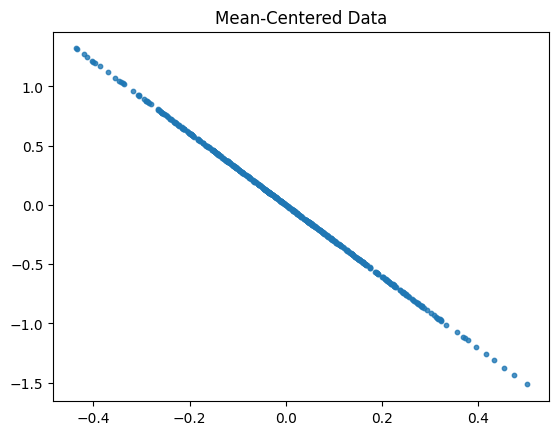

In [12]:
projection = vt.T[:, 1].reshape(-1, 1)
x_approx = x_cent.dot(projection.dot(projection.T))
plt.scatter(x_approx[:, 0], x_approx[:, 1], s=10, alpha=0.8)
plt.title("Mean-Centered Data")
plt.show()

The line has been inverted and the scale is much smaller.